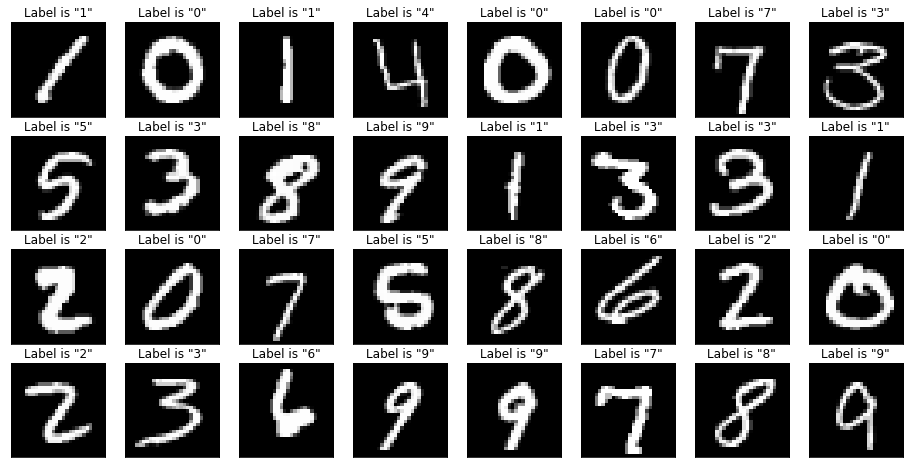

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5212 - acc: 0.8661 - val_loss: 0.3357 - val_acc: 0.9068

               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4132
           1       0.94      0.97      0.95      4684
           2       0.91      0.88      0.90      4177
           3       0.84      0.91      0.87      4351
           4       0.91      0.92      0.91      4072
           5       0.89      0.81      0.85      3795
           6       0.94      0.95      0.95      4137
           7       0.

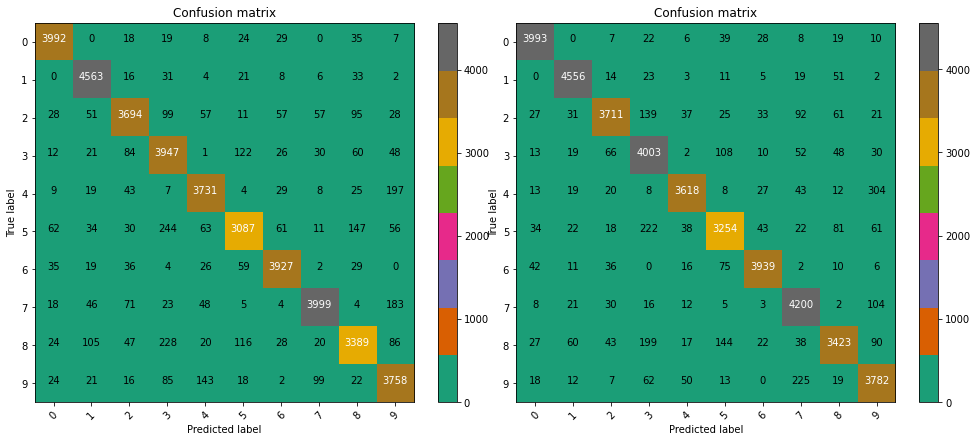

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras.utils

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Dark2):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#from keras.datasets import mnist
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

train = pd.read_csv('/content/gdrive/My Drive/train.csv', index_col = 0)

X_train = train.values[:].reshape(42000, 28, 28); X_test = X_train
y_train = np.array(train.index.format()); y_test = y_train

n = X_train.shape[0]
m = X_train.shape[1]*X_train.shape[2]
nclasses = 10

nrows = 4; ncols = 8
_, ax = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows))
for nsample in range(0, nrows*ncols):
#for k, nsample in enumerate(np.random.randint(low=0, high=n, size=nrows*ncols)):
    i = nsample // ncols
    j = nsample % ncols
    ax[i, j].imshow(X_train[nsample], cmap='gray')
    ax[i, j].set_title('Label is "{}"'.format(y_train[nsample]))
    ax[i, j].xaxis.set_visible(False)
    ax[i, j].yaxis.set_visible(False)
plt.show()

y_train_enc = keras.utils.np_utils.to_categorical(y_train, nclasses)
y_test_enc = keras.utils.np_utils.to_categorical(y_test, nclasses)

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(m, ), name="Input",))
model.add(Dense(units=nclasses, activation='softmax', name="Output",))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['acc'],)
model.summary()

train_history = model.fit(X_train.reshape(-1, m),
                          y_train_enc,
                          validation_data=(X_test.reshape(-1, m), y_test_enc),
                          epochs = 1)

predict_y = model.predict(X_test.reshape(-1, m))
y_val_hat = np.argmax(predict_y,axis=1)
y_val_org = np.argmax(y_test_enc, axis = 1)

print('\n', classification_report(y_val_org, y_val_hat))

confusion_mtx = confusion_matrix(y_val_org, y_val_hat)

plt.figure(figsize=(14, 6)); plt.subplot(1, 2, 1);
plot_confusion_matrix(confusion_mtx, classes = range(10))



model = Sequential()
model.add(Input(shape=(m, ), name="Input",))
model.add(Dense(units=128,  name="Hidden",))
#model.add(Dense(units=2, name="Hidden2",))
model.add(Dense(units=nclasses, activation='softmax', name="Output",))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['acc'],)
model.summary()

train_history = model.fit(X_train.reshape(-1, m),
                          y_train_enc,
                          validation_data=(X_test.reshape(-1, m), y_test_enc),
                          epochs = 1)

predict_y = model.predict(X_test.reshape(-1, m))
y_val_hat = np.argmax(predict_y,axis=1)
y_val_org = np.argmax(y_test_enc, axis = 1)

print('\n', classification_report(y_val_org, y_val_hat))

confusion_mtx = confusion_matrix(y_val_org, y_val_hat)

plt.subplot(1, 2, 2);
plot_confusion_matrix(confusion_mtx, classes = range(10))
plt.show()


In [ ]:
from google.colab import files
files.upload()
!ls

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)


Mounted at /content/gdrive
